<a href="https://colab.research.google.com/github/maheshkajjari/the-spark-foundation-internship/blob/main/task6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task6
#Prediction using Decision Tree Algorithm
#By - Mahesh Kumar Kajjari

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
 dir(load_iris())

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [3]:
 iris = load_iris()

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2



#Data visualization

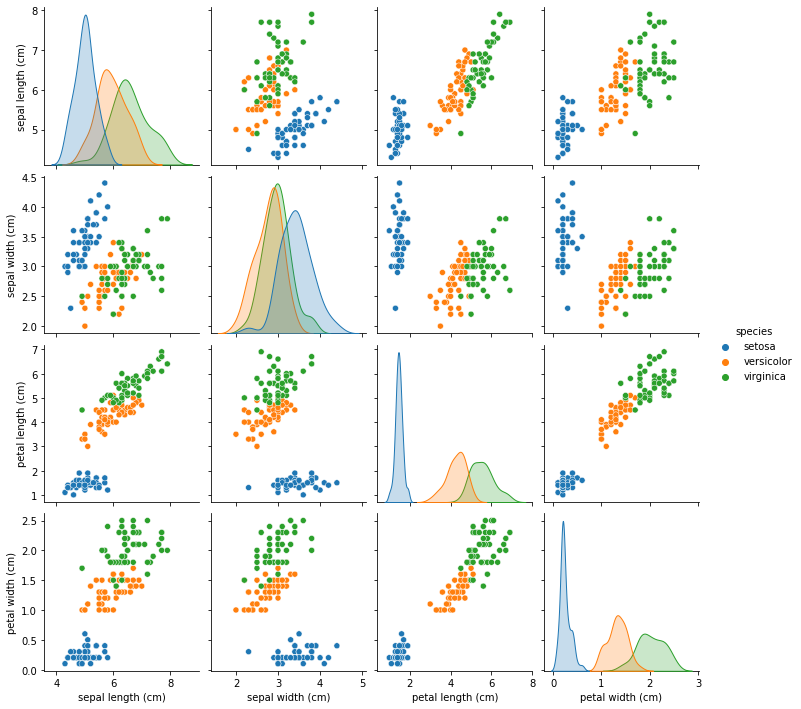

In [7]:
#Pair plot
sns.pairplot(df,hue='species',vars=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'])

This pairplot shows the distribution of single variables as well as relationship between two variables.

In [8]:
df = df.drop('species', axis = 'columns')

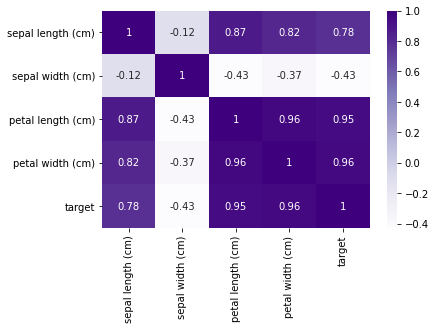

In [9]:


#Plotting correlation using heatmap
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='Purples')





This heatmap shows pearson correlation between features. It can be observed that petal length and petal width are highly correlated with out target.



#Preparing data for model

In [10]:
X = df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
y = df.target
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

 
#Model training

In [16]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [17]:
DecisionTreeClassifier()

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [18]:
dtc.score(X_test, y_test)

1.0


Visualization of Decision Tree Classifier

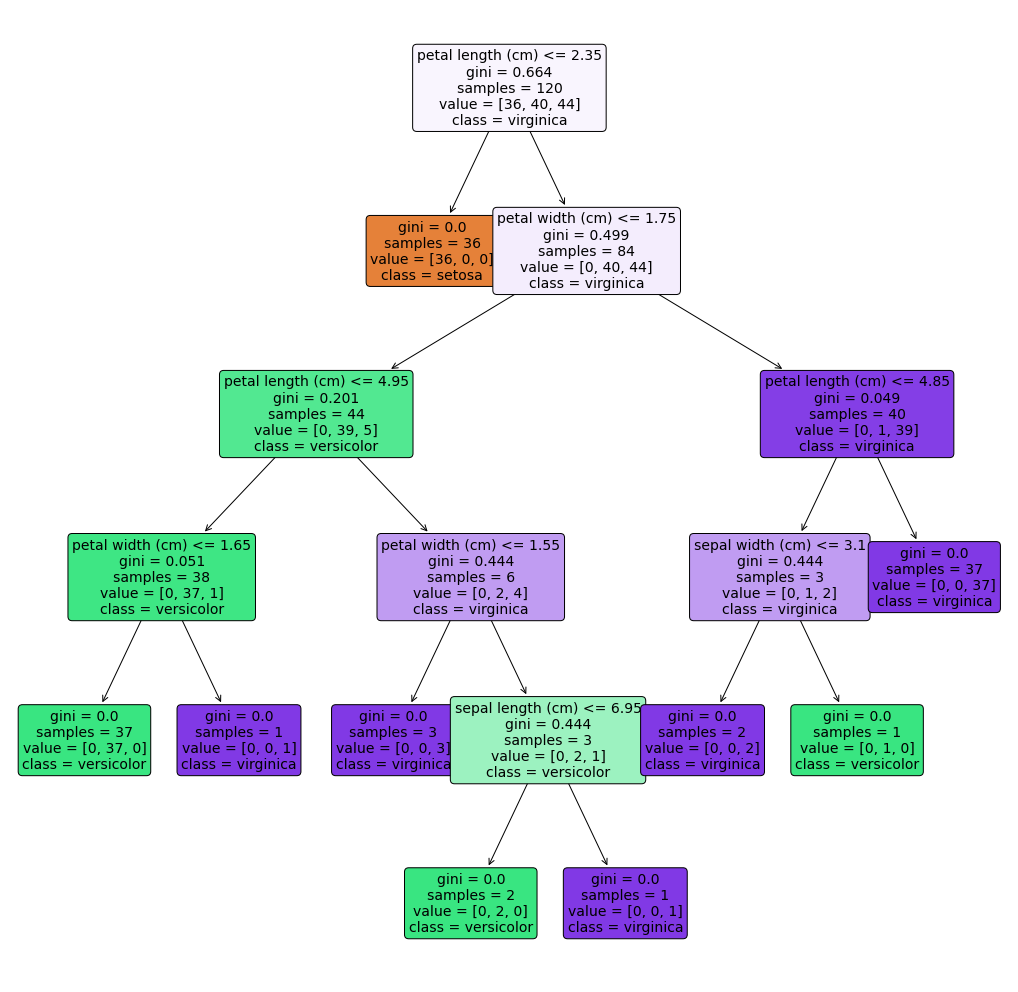

In [19]:
from sklearn.tree import plot_tree
plt.figure(figsize=(18,18))
a = plot_tree(dtc, 
              feature_names=iris.feature_names, 
              class_names=iris.target_names, 
              filled=True, 
              rounded=True, 
              fontsize=14)

#Thank you